<a href="https://colab.research.google.com/github/rainmaker29/robokalam/blob/master/robokalam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Input
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

### Utilities functions

In [148]:
#turnover calulator
def turnover_percent(begin,end,left):
  return (left/((begin+end)//2))*100

#Setting figuresize for all the upcoming plots
plt.figure(figsize=(9.7,9.27))
sns.set(rc={'figure.figsize':(9.7,9.27)})

#custom function for all countplots 
def countplot_with_values(data,x,limit):
  g=sns.countplot(data=data,x=x)
  ax=g
  for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
  _ = g.set_ylim(0,limit)


<Figure size 698.4x667.44 with 0 Axes>

# Loading data

In [0]:
# Creating dataframe
df = pd.read_csv("/content/drive/My Drive/robokalam/HR_comma_sep.csv",sep=",")

# Exploratory Data Analysis (EDA)

In [138]:
df.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,left,promotion_last_5years,role,salary
0,0.53,2,157,3,0,0.38,1,0,sales,low
1,0.86,5,262,6,0,0.80,1,0,sales,medium
2,0.88,7,272,4,0,0.11,1,0,sales,medium
3,0.87,5,223,5,0,0.72,1,0,sales,low
4,0.52,2,159,3,0,0.37,1,0,sales,low


In [139]:
df.isna().any()

last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
satisfaction_level       False
left                     False
promotion_last_5years    False
role                     False
salary                   False
dtype: bool

In [140]:
print(df['left'].value_counts())
left_count = sum(df.loc[df['left']==1,'role'].value_counts().to_list())
stay_count = sum(df.loc[df['left']==0,'role'].value_counts().to_list())

0    11428
1     3571
Name: left, dtype: int64


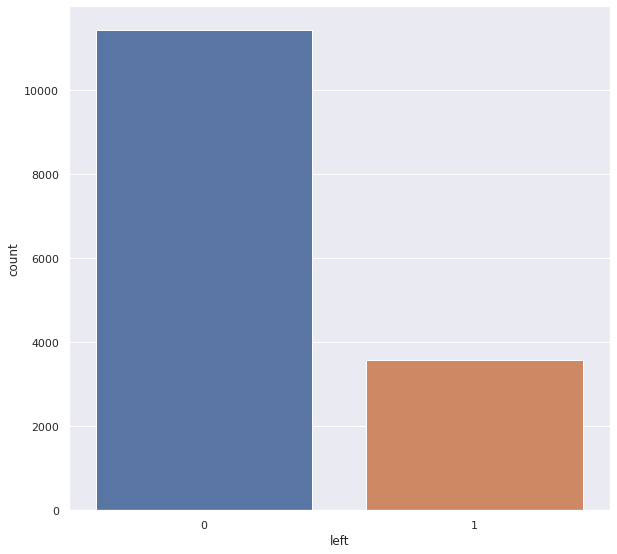

In [149]:
ax=sns.countplot(data=df,x=df['left'])

In [0]:
no_of_employees_at_beginning = left_count+stay_count
no_of_employees_at_end = stay_count

turnover = turnover_percent(begin=no_of_employees_at_beginning,end=no_of_employees_at_end,
                            left=left_count)
print("Turnover % of employees across the duration of given data : {0:.2f}".format(turnover))

Turnover % of employees across the duration of given data : 27.03


In [0]:
left_employees = df.loc[df['left']==1,:]

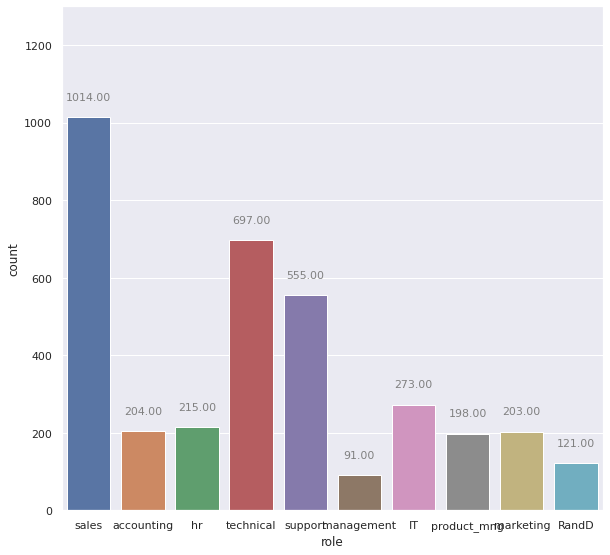

In [150]:
ax=countplot_with_values(data=left_employees,x=left_employees['role'],limit=1300)

Text(0.5, 1.0, 'average_montly_hours vs satisfaction_level')

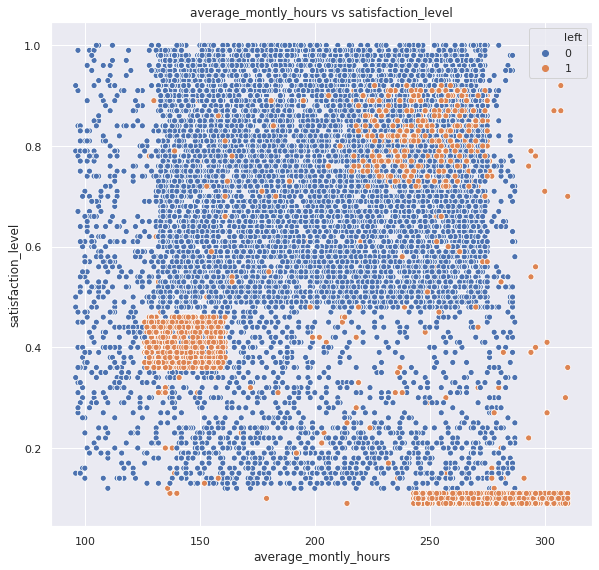

In [0]:
#Relationship between avg_monthly_hours and satisfaction level
#here we use a scatterplot because the x variable is a quantitative variable
#unlike most of the other variables in the data

ax=sns.scatterplot(data=df,x=df['average_montly_hours'],y=df['satisfaction_level'],hue=df['left'],)
plt.title("average_montly_hours vs satisfaction_level")



In [0]:
mhrs = left_employees.loc[left_employees['average_montly_hours'].between(120,170,inclusive=True),:]
mhrs_total = sum(mhrs.loc[mhrs['satisfaction_level'].between(0.35,0.47,inclusive=True),'role'].value_counts().to_list())

lhrs = left_employees.loc[left_employees['average_montly_hours']>220,:]
lhrs_total = sum(lhrs.loc[lhrs['satisfaction_level']<0.2,'role'].value_counts().to_list())

hhrs = left_employees.loc[left_employees['average_montly_hours'].between(200,270,inclusive=True),:]
hhrs_total = sum(hhrs.loc[hhrs['satisfaction_level'].between(0.7,0.95,inclusive=True),'role'].value_counts().to_list())


In [0]:
print("Total number of employees left despite of less avg_working_hours ",mhrs_total)
print("Total number of employees left due to heavy work : ",lhrs_total)
print("Number of employees left due to large avg working hours despite of being highly satisfied ",hhrs_total)

Total number of employees left despite of less avg_working_hours  1524
Total number of employees left due to heavy work :  897
Number of employees left due to large avg working hours despite of being highly satisfied  3114


In [130]:
accident_workers = df.loc[df['Work_accident']==1,:]
accident_left = sum(accident_workers.loc[accident_workers['left']==1,'role'].value_counts().to_list())
accident_remained = sum(accident_workers.loc[accident_workers['left']==0,'role'].value_counts().to_list())
print(accident_left)
percent_left_accident = (accident_left/(accident_left+accident_remained)) *100
print(percent_left_accident)

169
7.791609036422314


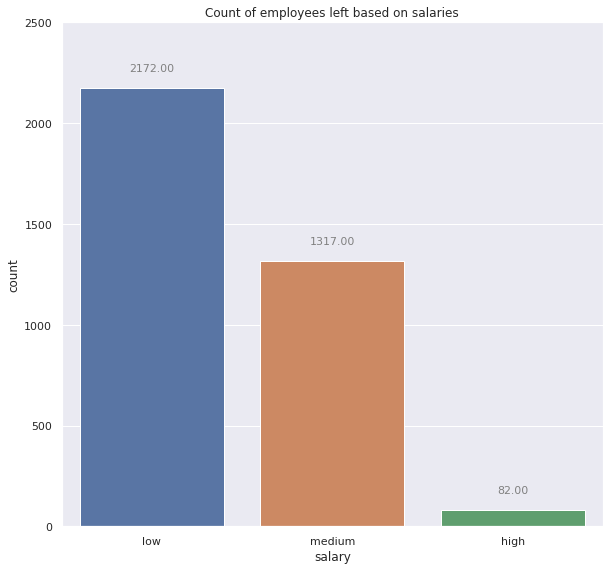

In [0]:
plt.title("Count of employees left based on salaries")
countplot_with_values(data=left_employees,x=left_employees['salary'],limit=2500)

In [0]:
low_sal_left = sum(left_employees.loc[left_employees['salary']=='low','role'].value_counts().to_list())
low_sal_left

2172

In [0]:
left_no_promotion = sum(left_employees.loc[left_employees['promotion_last_5years']==0,'role']
                        .value_counts().to_list())
print(left_no_promotion)

3552


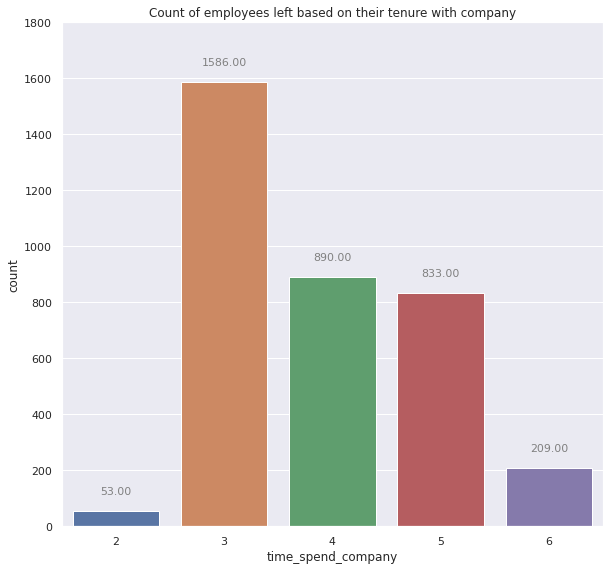

In [0]:
plt.title("Count of employees left based on their tenure with company")
countplot_with_values(data=left_employees,x=left_employees['time_spend_company'],limit=1800)

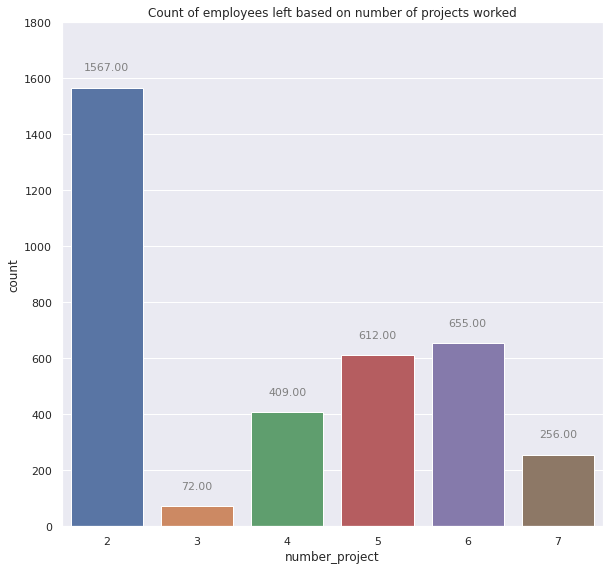

In [0]:
plt.title("Count of employees left based on number of projects worked")
countplot_with_values(data=left_employees,x=left_employees['number_project'],limit=1800)

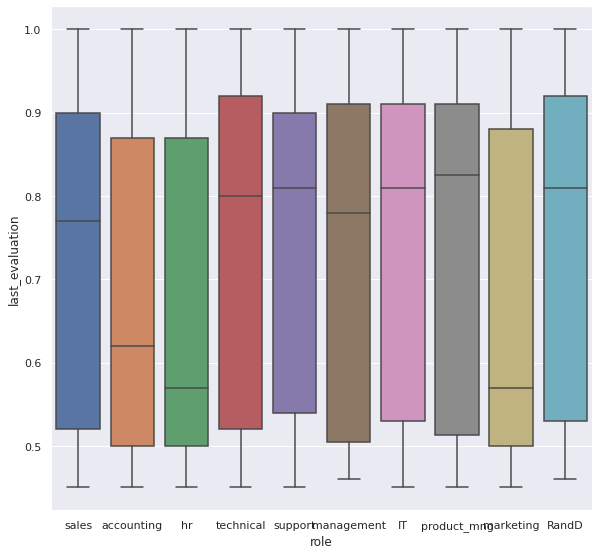

In [0]:
sns.boxplot(data=left_employees,x=left_employees['role'],y=left_employees['last_evaluation'])

# Insights from EDA

## Major information on employees who left the company

1.   A total of 3571 employees left the company while 11428 remained
2.  The turnover rate is 27.03%
3. Based on department/role
  *   1014 employees left from 'sales'
  *   697 employees left from 'technical'
  *   555 employees left from 'support'

4.  Based on average working hours and satisfaction level.

  *   1524 were moderately satisfied and had less average working hours
  *   897 employees were not satisfied and had high average working hours
  *   3114 employees were highly satisfied and had high average working hours
5.  169 employees faced work accidents which is 7.79% of all employees who faced work accidents.
6.  Based on Salaries
    *   2172 employees had low salaries
    *   1317 employees had medium salaries
    *   82 employees had high salaries
7. 3552 employees didn't get promoted over the past 5 years
8. Based on job duration 
  *   1586 employees worked for 3 years
  *   890 employees worked for 4 years
  *   833 employees worked for 5 years
9. Based on number of projects 
  *   1567 employees worked on only 2 projects before leaving
  *   655 employees worked on 6 projects before leaving
  *   612 employees worked on 5 projects before leaving








# Data Pre-processing

In [156]:
df.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,left,promotion_last_5years,role,salary
0,0.53,2,157,3,0,0.38,1,0,sales,low
1,0.86,5,262,6,0,0.80,1,0,sales,medium
2,0.88,7,272,4,0,0.11,1,0,sales,medium
3,0.87,5,223,5,0,0.72,1,0,sales,low
4,0.52,2,159,3,0,0.37,1,0,sales,low


In [155]:
df.dtypes

last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
satisfaction_level       float64
left                       int64
promotion_last_5years      int64
role                      object
salary                    object
dtype: object